In [17]:
import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import squarify

from operator import itemgetter 

In [2]:
df = pd.read_csv('../Data/Statewise_Daily.csv')
daily_df = pd.read_csv('../Data/COVID_Daily_Count.csv')
conf_df = df.loc[(df['Status']=="Confirmed"),:]
recvd_df = df.loc[(df['Status']=="Recovered"),:]
dead_df = df.loc[(df['Status']=="Deceased"),:]

# Active Cases

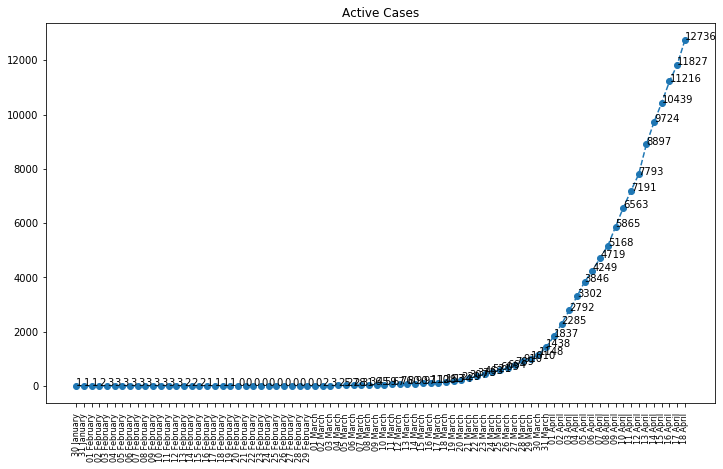

In [3]:
fig = plt.figure(figsize=(12,7))
ax = fig.add_subplot(111)
ax.set_title('Active Cases')
ax.plot(daily_df['Date'], daily_df['Active'], marker='o', linestyle='--')

for i,j in zip(daily_df['Date'], daily_df['Active']):
    plt.text(i,j, str(j))
plt.xticks(rotation=90, fontsize=8)
# plt.fill_between(daily_df['Date'], daily_df['Active'], 0, alpha='0.05')
plt.show()


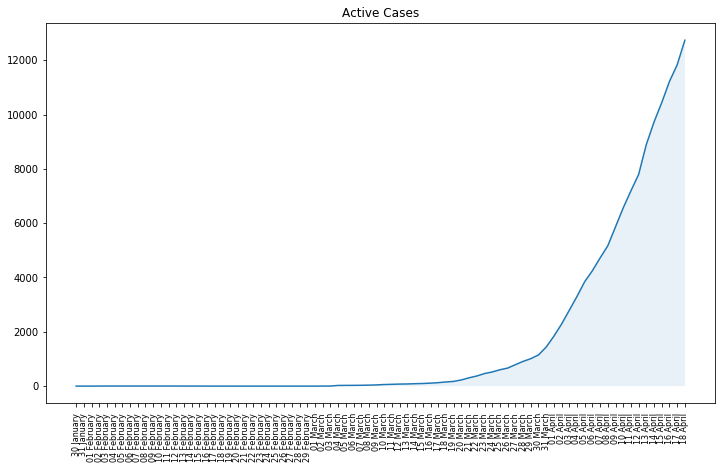

In [4]:
fig = plt.figure(figsize=(12,7))
ax = fig.add_subplot(111)
ax.set_title('Active Cases')
ax.plot(daily_df['Date'], daily_df['Active'])

plt.xticks(rotation=90, fontsize=8)
plt.fill_between(daily_df['Date'], daily_df['Active'], 0, alpha='0.1')
plt.show()

# Daily Case Analysis

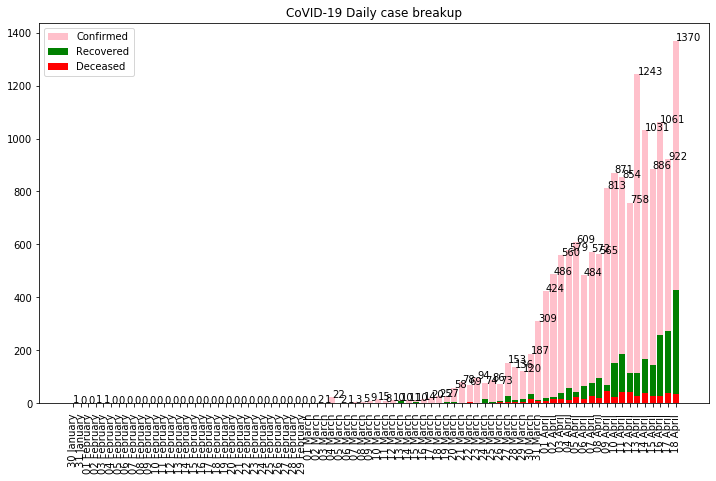

In [5]:
fig = plt.figure(figsize=((12,7)))
ax = fig.add_subplot(111)
ax.set_title('CoVID-19 Daily case breakup')

# ax.plot(df['Date'], df['Daily Confirmed'], color='black')
ax.bar(daily_df['Date'], daily_df['Daily Confirmed'], color='pink')
for i,j in zip(daily_df['Date'], daily_df['Daily Confirmed']):
    plt.text(i,j, str(j))
        

ax.bar(daily_df['Date'], daily_df['Daily Recovered'], color='green')
# for i,j in zip(df['Date'], df['Daily Recovered']):
#     plt.text(i,j, str(j))
    
ax.bar(daily_df['Date'], daily_df['Daily Deceased'], color='red')
# for i,j in zip(df['Date'], df['Daily Deceased']):
#     plt.text(i,j, str(j))
        

# ax.plot(df_total['Date'], df_total['Recovered'], marker='o', color = 'green')
# ax.plot(df_total['Date'], df_total['Death'], marker='o', color = 'red')

plt.legend(['Confirmed',
            'Recovered', 
            'Deceased'])
plt.xticks(rotation=90)
plt.show()

# Total Case Analysis

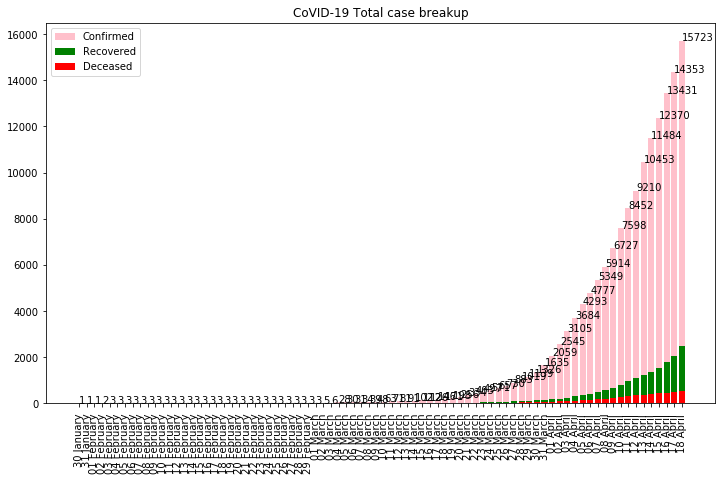

In [6]:
fig = plt.figure(figsize=((12,7)))
ax = fig.add_subplot(111)
ax.set_title('CoVID-19 Total case breakup')

ax.bar(daily_df['Date'], daily_df['Total Confirmed'], color='pink')
for i,j in zip(daily_df['Date'], daily_df['Total Confirmed']):
    plt.text(i,j, str(j))
        

ax.bar(daily_df['Date'], daily_df['Total Recovered'], color='green')
# for i,j in zip(df['Date'], df['Total Recovered']):
#     plt.text(i,j, str(j))
    
ax.bar(daily_df['Date'], daily_df['Total Deceased'], color='red')
# for i,j in zip(df['Date'], df['Total Deceased']):
#     plt.text(i,j, str(j))
        

# ax.plot(df_total['Date'], df_total['Recovered'], marker='o', color = 'green')
# ax.plot(df_total['Date'], df_total['Death'], marker='o', color = 'red')

plt.legend(['Confirmed',
            'Recovered', 
            'Deceased'])
plt.xticks(rotation=90)
plt.show()

## Rate of Growth

Current Growth rate: 8.71%


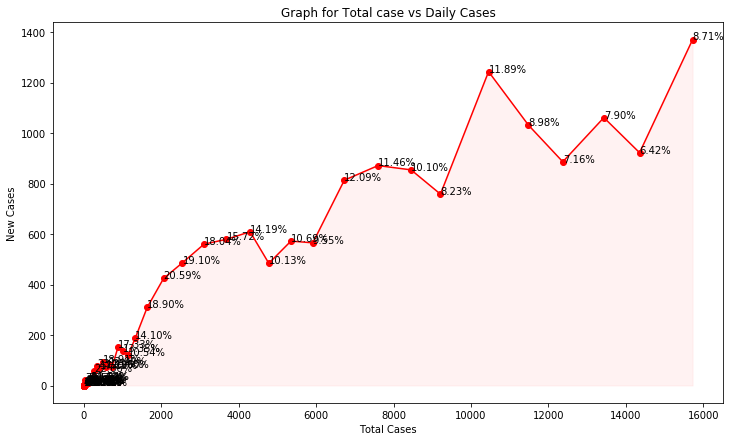

In [8]:
fig = plt.figure(figsize=(12,7))
ax = fig.add_subplot(111)
ax.set_title('Graph for Total case vs Daily Cases')
ax.plot(daily_df['Total Confirmed'], daily_df['Daily Confirmed'], marker='o', color='red')

for i,j in zip(daily_df['Total Confirmed'], daily_df['Daily Confirmed']):
    Rate = (j/i)*100
    Rate = "{:.2f}%".format(round(Rate, 2))
    plt.text(i,j, Rate)
print('Current Growth rate:', Rate)
    

ax.set_xlabel('Total Cases')
ax.set_ylabel('New Cases')
# plt.yticks(rotation=90)

plt.fill_between(daily_df['Total Confirmed'], daily_df['Daily Confirmed'], 0, color='red', alpha='0.05')
plt.show()

## Logarithmic Graph to get the point for flattening of curve

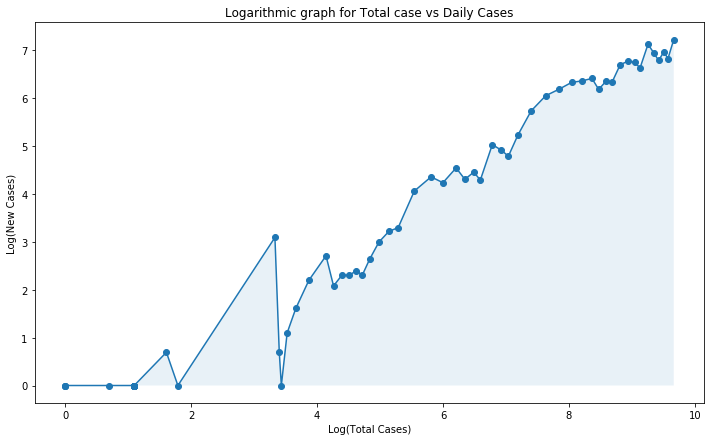

In [9]:
def log(num):
    if num == 0:
        return 0
    return np.log(num)

daily_df['Log_Total_confirm'] = daily_df['Total Confirmed'].astype(int).apply(log)
daily_df['Log_daily_confirm'] = daily_df['Daily Confirmed'].astype(int).apply(log)

fig = plt.figure(figsize=(12,7))
ax = fig.add_subplot(111)
ax.set_title('Logarithmic graph for Total case vs Daily Cases')

ax.plot(daily_df['Log_Total_confirm'], daily_df['Log_daily_confirm'], marker='o')

ax.set_xlabel('Log(Total Cases)')
ax.set_ylabel('Log(New Cases)')

plt.fill_between(daily_df['Log_Total_confirm'], daily_df['Log_daily_confirm'], 0, alpha='0.1')
# plt.yticks(rotation=90)
plt.show()

# Statewise Anlaysis

In [11]:
# fig = plt.figure(figsize=(20,10))
# ax = fig.add_subplot(111)

# for i in range(3, len(list(conf_df))):
#     ax.plot(conf_df['Date'], np.cumsum(conf_df[conf_df.columns[i]]))
# plt.xticks(rotation=90)
# plt.show()
# # conf_df.plot(mark_right=False, figsize=(20,10))

In [12]:
N = 5
conf_df1 = np.cumsum(conf_df)
conf_df1['Date'] = conf_df['Date']
conf_df1.drop(['Status', 'Date', 'TT'], axis = 1, inplace=True) 
conf_df1 = conf_df1.tail(1)
conf_dict = conf_df1.to_dict('r')[0]
column_names = list(dict(sorted(conf_dict.items(), key = itemgetter(1), reverse = True)[:N]).keys())
column_names.append('KL')
column_names

['MH', 'DL', 'MP', 'GJ', 'TN', 'KL']

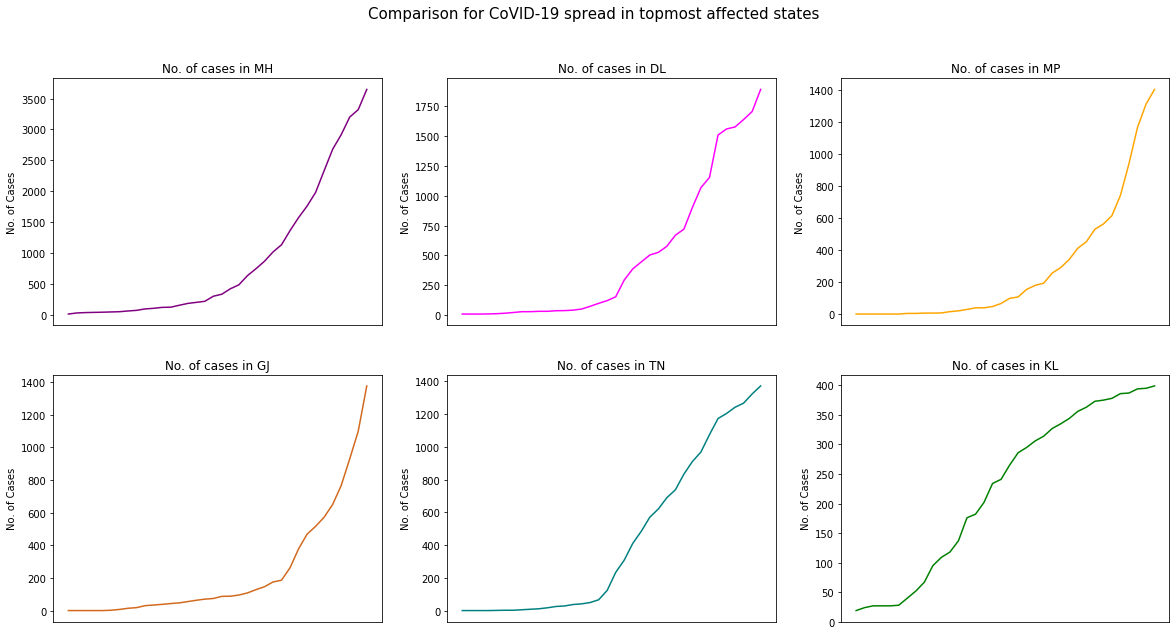

In [13]:
fig = plt.figure(figsize=(20,10))
fig.suptitle('Comparison for CoVID-19 spread in topmost affected states', fontsize=15)

ax = fig.add_subplot(231)
ax.plot(conf_df['Date'], np.cumsum(conf_df[column_names[0]]), color='purple')
ax.set_title('No. of cases in ' + column_names[0])
ax.set_ylabel('No. of Cases')
plt.xticks([], [])
plt.xticks(rotation=70)

ax = fig.add_subplot(232)
ax.plot(conf_df['Date'], np.cumsum(conf_df[column_names[1]]), color='magenta')
ax.set_title('No. of cases in ' + column_names[1])
ax.set_ylabel('No. of Cases')
plt.xticks([], [])
plt.xticks(rotation=90)

ax = fig.add_subplot(233)
ax.plot(conf_df['Date'], np.cumsum(conf_df[column_names[2]]), color='orange')
ax.set_title('No. of cases in ' + column_names[2])
ax.set_ylabel('No. of Cases')
plt.xticks([], [])
plt.xticks(rotation=90)

ax = fig.add_subplot(234)
ax.plot(conf_df['Date'], np.cumsum(conf_df[column_names[3]]), color='chocolate')
ax.set_title('No. of cases in ' + column_names[3])
ax.set_ylabel('No. of Cases')
plt.xticks([], [])
plt.xticks(rotation=90)

ax = fig.add_subplot(235)
ax.plot(conf_df['Date'], np.cumsum(conf_df[column_names[4]]), color='teal')
ax.set_title('No. of cases in ' + column_names[4])
ax.set_ylabel('No. of Cases')
plt.xticks([], [])
plt.xticks(rotation=90)

ax = fig.add_subplot(236)
ax.plot(conf_df['Date'], np.cumsum(conf_df[column_names[5]]), color='green')
ax.set_title('No. of cases in ' + column_names[5])
ax.set_ylabel('No. of Cases')
plt.xticks([], [])
plt.xticks(rotation=90)


plt.show()

In [11]:
# #Pie Chart
# fig = plt.figure(figsize=(12,12))
# ax = fig.add_axes([0,0,1,1])
# ax.axis('equal')
# ax.pie(list(conf_dict.values()), labels = list(conf_dict.keys()),autopct='%1.1f%%')
# plt.show()

In [14]:
conf_dict = {key:val for key, val in conf_dict.items() if val != 0}
conf_dict = sorted(conf_dict.items(), key=lambda x: x[1], reverse=True)  

In [25]:
colors=['#0B615E', '#F4FA58', '#8A2908', '#FAAC58', '#FFFF00', '#688A08', '#80FF00', '#04B404', '#04B431', '#2EFEC8', 
       '#0B2F3A', '#013ADF', '#2E2EFE', '#642EFE', '#D358F7', '#B4045F', '#FF0040', '#585858', '#3A2F0B', '#3B0B17',
       '#2E2EFE', '#61380B', '#688A08', '#A5DF00', '#A9F5A9', '#BE81F7', '#58FAF4', '#F5DA81', '#BDBDBD', '#819FF7', 
       '#380B61', '#F781F3', '#DF013A', '#FE642E', '#E1F5A9', '#F5A9A9', '#2EFEC8']

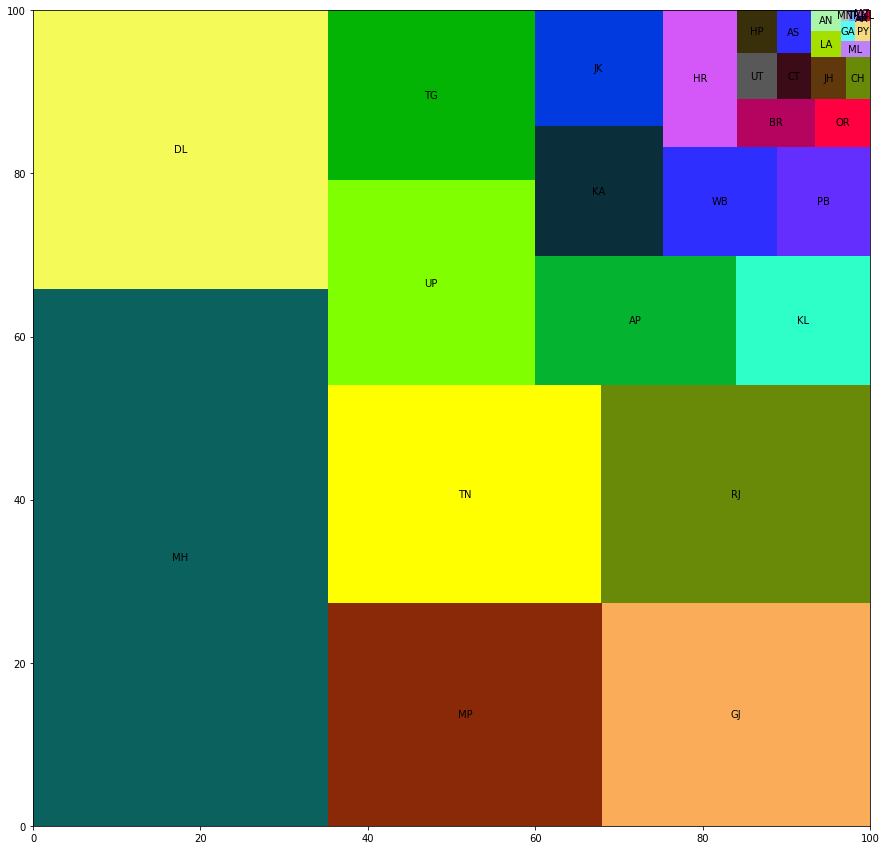

In [27]:
cases = []
states = []
for i in range(len(conf_dict)):
    cases.append(conf_dict[i][1])
    states.append(conf_dict[i][0])
fig = plt.figure(figsize=(15,15))


# cmap = matplotlib.cm.Blues
# mini=min(cases)
# maxi=max(cases)
# norm = matplotlib.colors.Normalize(vmin=mini, vmax=maxi)
# colors = [cmap(norm(value)) for value in cases]

squarify.plot(sizes=cases, label=states, alpha=1, color=colors)

plt.show()